In [ ]:
import pandas as pd;
from scipy.stats import zscore
import torch as torch;
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
 
 
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from sklearn.model_selection import train_test_split

np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#read in the dataset, convert to numpy
dfData = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
np_x=dfData[list(dfData.columns)[0:-1]].apply(zscore).to_numpy();
np_y = pd.get_dummies(dfData['variety']).to_numpy();
n_classes = 3;

x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.20, random_state=42)
n_features = x_train.shape[1];


# reshape training and testing data
# training data
x_train = x_train.astype(dtype='float64')
y_train = y_train.astype(dtype='float64')

# testing data
x_test = x_test.astype(dtype='float64')
y_test = y_test.astype(dtype='float64')

n_train = x_train.shape[0]

#define pytorch linear binary classifier
# create tensor variables for data, we do not need gradient w.r.t. to them
t_x_train=torch.tensor(x_train,requires_grad=False,device=device);
t_y_train=torch.tensor(y_train,requires_grad=False,device=device);


t_x_test=torch.tensor(x_test,requires_grad=False,device=device);
t_y_test=torch.tensor(y_test,requires_grad=False,device=device);


#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent,
#so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

batch_size=32;
n_epochs = 10000;

for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;

    
    
    print(i,batch_risk,test_risk.item(),accuracy,test_accuracy)
    
    #print (t_x_test.shape,test_normalized_activations.shape , t_y_test.shape)





Streaming output truncated to the last 5000 lines.
5000 0.2612263256110399 0.2181617450653361 0.9166666666666666 0.9666666666666667
5001 0.2612046998720115 0.21814318194346743 0.9166666666666666 0.9666666666666667
5002 0.26118307754000897 0.21812462458563556 0.9166666666666666 0.9666666666666667
5003 0.2611614600777979 0.2181060709163285 0.9166666666666666 0.9666666666666667
5004 0.2611398462467693 0.218087521961309 0.9166666666666666 0.9666666666666667
5005 0.26111823728289174 0.218068976691661 0.9166666666666666 0.9666666666666667
5006 0.26109663172316666 0.21805043718931222 0.9166666666666666 0.9666666666666667
5007 0.26107503102908836 0.2180319013692437 0.9166666666666666 0.9666666666666667
5008 0.2610534364336654 0.21801336820225575 0.9166666666666666 0.9666666666666667
5009 0.26103184669661034 0.21799483871401695 0.9166666666666666 0.9666666666666667
5010 0.26101026058053695 0.21797631393041447 0.9166666666666666 0.9666666666666667
5011 0.2609886793202064 0.21795779282242142 0.91

In [ ]:
import matplotlib.pyplot as plt
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.20, random_state=42)
n_features = x_train.shape[1];


# reshape training and testing data
# training data
x_train = x_train.astype(dtype='float64')
y_train = y_train.astype(dtype='float64')

# testing data
x_test = x_test.astype(dtype='float64')
y_test = y_test.astype(dtype='float64')

n_train = x_train.shape[0]

#define pytorch linear binary classifier
# create tensor variables for data, we do not need gradient w.r.t. to them
t_x_train=torch.tensor(x_train,requires_grad=False,device=device);
t_y_train=torch.tensor(y_train,requires_grad=False,device=device);


t_x_test=torch.tensor(x_test,requires_grad=False,device=device);
t_y_test=torch.tensor(y_test,requires_grad=False,device=device);
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)
batch_size=32;
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk1.append(risk.item())
            a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.01;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)
batch_size = 64
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk2.append(risk.item())
            a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

batch_size = 120;
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk3.append(risk.item())
            a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["SGD:Learning rate 0.001"]=risk_list[0]
dict1["SGD:Learning rate 0.01"]=risk_list[1]
dict1["SGD:Learning rate 0.1"]=risk_list[2]

dict2["SGD:Learning rate 0.001"]=accuracy_list[0]
dict2["SGD:Learning rate 0.01"]=accuracy_list[1]
dict2["SGD:Learning rate 0.1"]=accuracy_list[2]

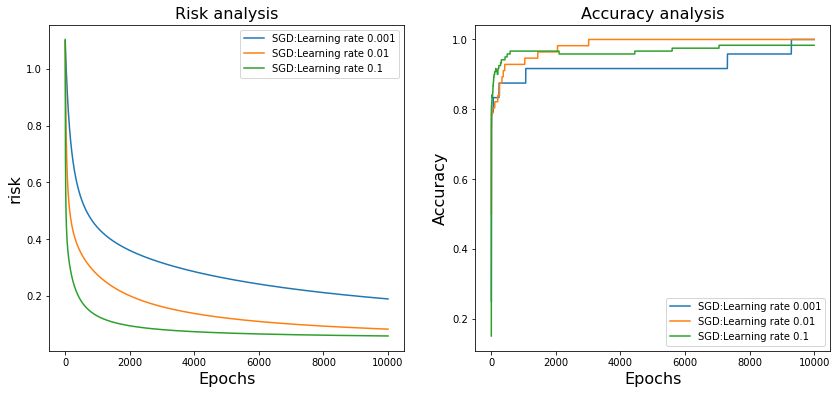

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.01"], label='SGD:Learning rate 0.01')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.01"], label='SGD:Learning rate 0.01')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()



In [ ]:
import matplotlib.pyplot as plt
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.20, random_state=42)
n_features = x_train.shape[1];


# reshape training and testing data
# training data
x_train = x_train.astype(dtype='float64')
y_train = y_train.astype(dtype='float64')

# testing data
x_test = x_test.astype(dtype='float64')
y_test = y_test.astype(dtype='float64')

n_train = x_train.shape[0]

#define pytorch linear binary classifier
# create tensor variables for data, we do not need gradient w.r.t. to them
t_x_train=torch.tensor(x_train,requires_grad=False,device=device);
t_y_train=torch.tensor(y_train,requires_grad=False,device=device);


t_x_test=torch.tensor(x_test,requires_grad=False,device=device);
t_y_test=torch.tensor(y_test,requires_grad=False,device=device);
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)
batch_size=32;
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk1.append(risk.item())
            a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.01;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)
batch_size = 64
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk2.append(risk.item())
            a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

batch_size = 120;
n_epochs = 10000;
for i in range(n_epochs):    
    
    for j in range(0,n_train,batch_size):
        t_x_train = torch.tensor(x_train[j:j+batch_size,:],requires_grad=False,device=device);
        t_y_train = torch.tensor(y_train[j:j+batch_size,:],requires_grad=False,device=device);
        
        # clear previous gradient calculations
        optimizer.zero_grad();
    
        # calculate model predictions
        linear_predictions = torch.matmul(t_x_train,W)+b
        activations =  torch.exp(linear_predictions);
    
        #Passing through softmax
        sum_activations = torch.sum(activations,dim=1,keepdim=True)
        normalized_activations = torch.div(activations, sum_activations);
        cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
        risk = -1.0 * torch.mean(cross_entropy_loss );
    
    
        #calculate gradients of risk w.r.t. W,b and propagate them back
        risk.backward();
        # use the gradient to change W, b
        optimizer.step();
        
        batch_risk=risk.item();
        # calculate accuracy (on the training set!)
        true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
        pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
        accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
        error = 1.0 - accuracy;
        
    # after all the batches in this epoch are done, we calculate test set risk and accuracy
    with (torch.no_grad()):
            linear_predictions = torch.matmul(t_x_test,W)+b
            activations =  torch.exp(linear_predictions);
    
            #Passing through softmax
            sum_activations = torch.sum(activations,dim=1,keepdim=True)
            test_normalized_activations = torch.div(activations, sum_activations);
            cross_entropy_loss = torch.sum(torch.multiply(t_y_test,torch.log(test_normalized_activations)),dim=1 )
    
            test_risk = -1.0 * torch.mean(cross_entropy_loss );
    
            test_true_class = np.argmax(t_y_test.detach().cpu().numpy(),axis=1)
            test_pred_class = np.argmax(test_normalized_activations.detach().cpu().numpy(),axis=1)
            test_accuracy = np.count_nonzero(test_true_class == test_pred_class)/test_pred_class.shape[0];
            test_error = 1.0 - test_accuracy;
            risk3.append(risk.item())
            a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["ADM:Learning rate 0.001"]=risk_list[0]
dict1["ADM:Learning rate 0.01"]=risk_list[1]
dict1["ADM:Learning rate 0.1"]=risk_list[2]

dict2["ADM:Learning rate 0.001"]=accuracy_list[0]
dict2["ADM:Learning rate 0.01"]=accuracy_list[1]
dict2["ADM:Learning rate 0.1"]=accuracy_list[2]

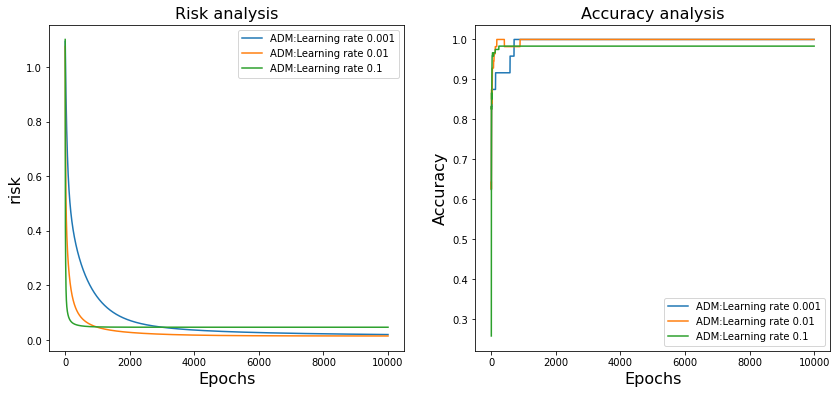

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.01"], label='ADM:Learning rate 0.01')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.01"], label='ADM:Learning rate 0.01')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()

